In [1]:
pip install pymc

In [2]:
import numpy as np
import pandas as pd

# Simulating the Coin Toss Dataset
np.random.seed(42)
n_tosses = 100
true_p = 0.6  # True probability of heads

# Simulate the tosses: 1 for heads, 0 for tails
tosses = np.random.binomial(n=1, p=true_p, size=n_tosses)
n_heads = np.sum(tosses)
n_tails = n_tosses - n_heads

# Creating the dataset
coin_toss_data = {
    'Heads': n_heads,
    'Tails': n_tails,
    'Total': n_tosses
}

# Display the results
df = pd.DataFrame([coin_toss_data])
display(df)

,Heads,Tails,Total
0,63,37,100


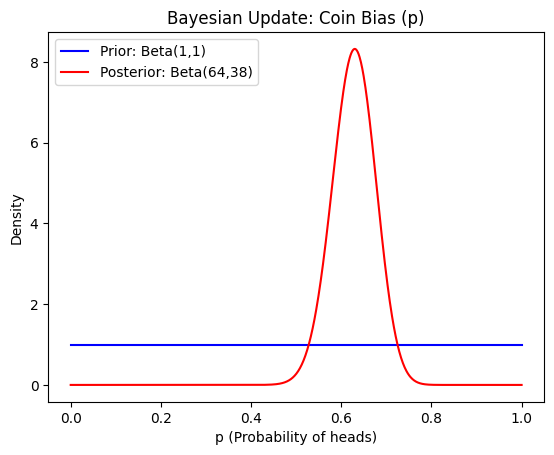

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define prior (Beta(1, 1)) and observed data
alpha_prior = 1  # Beta prior parameters
beta_prior = 1
x = n_heads  # Number of heads observed
n = n_tosses  # Total number of tosses

# Posterior parameters (updated after observing the data)
alpha_post = alpha_prior + x
beta_post = beta_prior + (n - x)

# Plot the prior and posterior distributions
x_vals = np.linspace(0, 1, 1000)

# Plot Prior (Beta(1, 1))
prior_vals = beta.pdf(x_vals, alpha_prior, beta_prior)
plt.plot(x_vals, prior_vals, label='Prior: Beta(1,1)', color='blue')

# Plot Posterior (Beta(61, 41))
posterior_vals = beta.pdf(x_vals, alpha_post, beta_post)
plt.plot(x_vals, posterior_vals, label=f'Posterior: Beta({alpha_post},{beta_post})', color='red')

plt.title("Bayesian Update: Coin Bias (p)")
plt.xlabel("p (Probability of heads)")
plt.ylabel("Density")
plt.legend()
plt.show()

In [4]:
# Calculate the mean and 95% credible interval of the posterior
posterior_mean = alpha_post / (alpha_post + beta_post)
credible_interval = beta.ppf([0.025, 0.975], alpha_post, beta_post)

print(posterior_mean, credible_interval)

0.6274509803921569 [0.53193123 0.71823541]
